In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import power_transform
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection  import cross_val_score

# Data Loading

In [2]:
df = pd.read_csv("C:\\Users\\chawl\\Documents\\Micro-Credit-Project\\Micro Credit Project\\Data file.csv")

In [3]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


# EDA

In [4]:
df.shape

(209593, 37)

We have 209593 rows and 37 columns in our dataset

In [5]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

pcircle, pdate, msisdn are of type object which will be required to be converted or removed/convertedwhile training the model

In [6]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

We have 0 null values in our dataset

In [7]:
df['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

All the values in pcircle attribute are same. Hence can be removed from the dataset

In [8]:
df.describe(include='all')

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
count,209593.000000,209593.000000,209593,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593,209593
unique,NaN,NaN,186243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,82
top,NaN,NaN,04581I85330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UPW,2016-07-04
freq,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209593,3150
mean,104797.000000,0.875177,NaN,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,...,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,NaN,NaN
std,60504.431823,0.330519,NaN,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,...,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,NaN,NaN
min,1.000000,0.000000,NaN,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,52399.000000,1.000000,NaN,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,104797.000000,1.000000,NaN,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,NaN,NaN
75%,157195.000000,1.000000,NaN,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,NaN,NaN


Attributes have max value way greater than 75% value. The dataset contains values which are outliers

<AxesSubplot:xlabel='label', ylabel='count'>

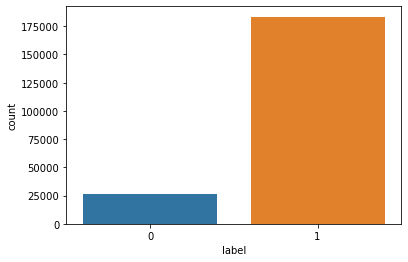

In [9]:
sns.countplot(x='label',data=df)

Data in target variable label is highly unbalanced, Before training the model unbalanced data will be required to be converted into balanced data to have better performing model with increased accuracy and Re-call

In [10]:
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate


We have 0  duplicate rows in our dataset

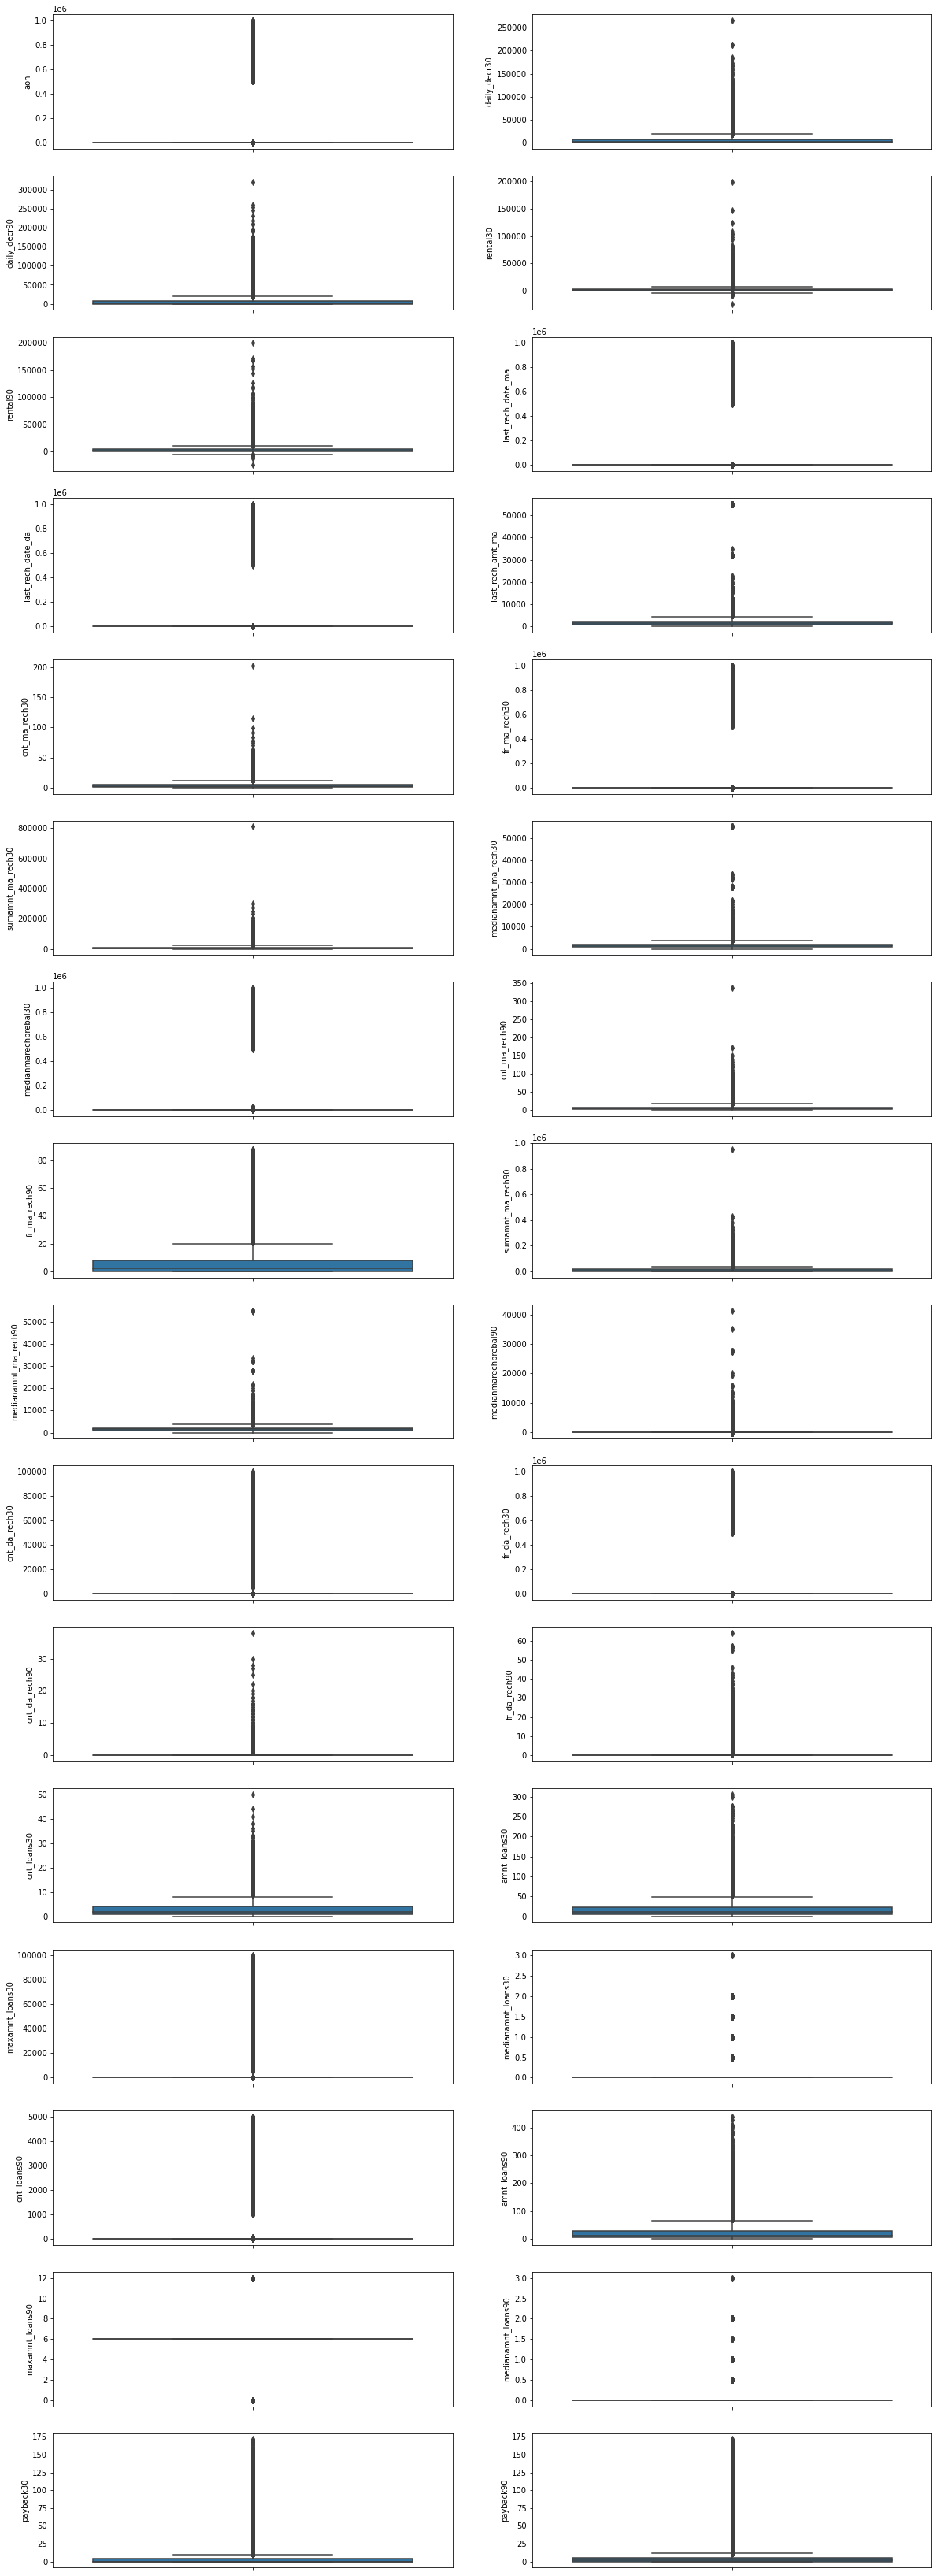

In [11]:

counter=1
plt.figure(figsize=(20,150))
columns = ['aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90']
counter=1;
for i in range(0,len(columns)):
        plt.subplot(40,2,counter)
        counter=counter+1
        sns.boxplot(y=columns[i],hue = columns[i],data=df)
        #sns.boxplot(df[columns[i]])

outliers are present in every column, Hence outlier removal/replacement will be required before training the model

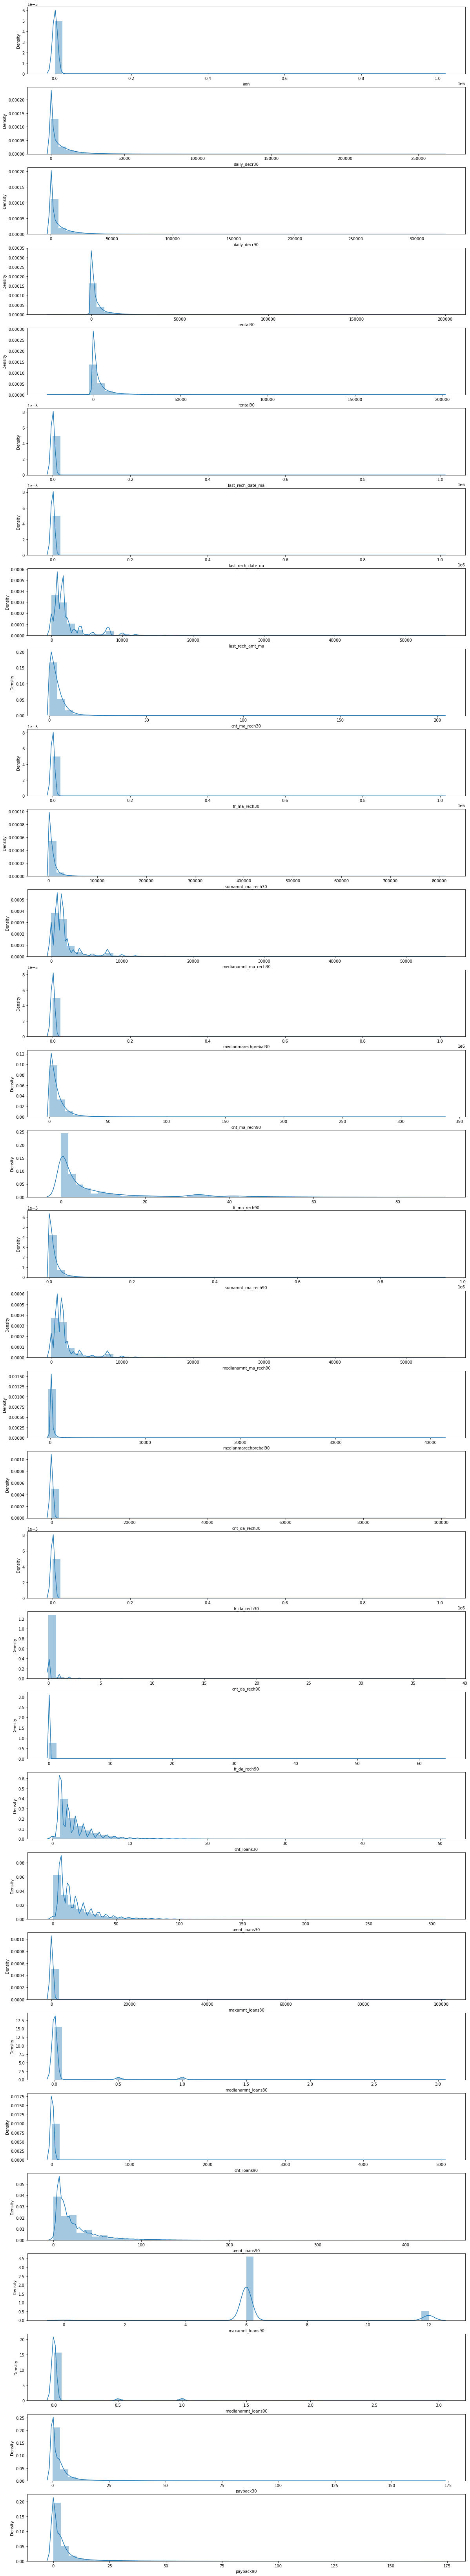

In [12]:

counter=1
plt.figure(figsize=(20,150))
columns = ['aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90']
counter=1;
for i in range(0,len(columns)):
        plt.subplot(40,1,counter)
        counter=counter+1
        sns.distplot(df[columns[i]])

last_rech_amt_ma, medianamnt_ma_rech_30, medianamnt_ma_rech90, cnt_da_rech_90, cnt_loans_30,amnt_loans_30 are not normally distributed

In [13]:
df.skew()

Unnamed: 0               0.000000
label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90  

The dataset is skewed, We will be required to remove skewness before training the model

<AxesSubplot:>

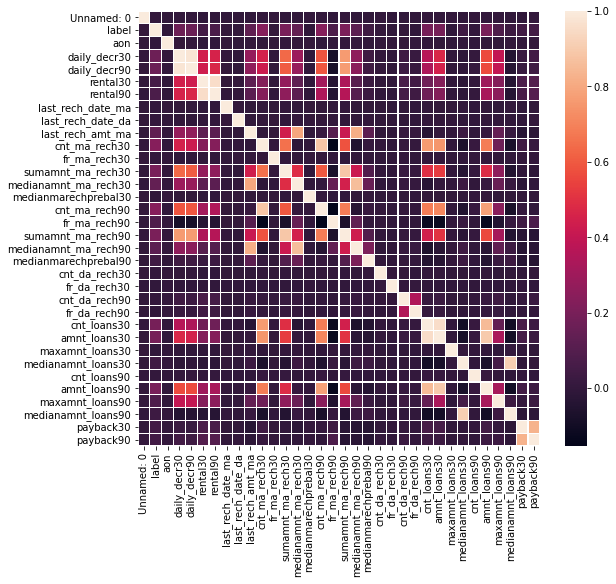

In [14]:
corrmat = df.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, linewidths = 0.1)

observations: 
 
    amnt_loans30 is highly corelated with cnt_loans30
    rental30 is highly correlated with rental 90
    daily_decr30 is highly correlated with daily_decr90

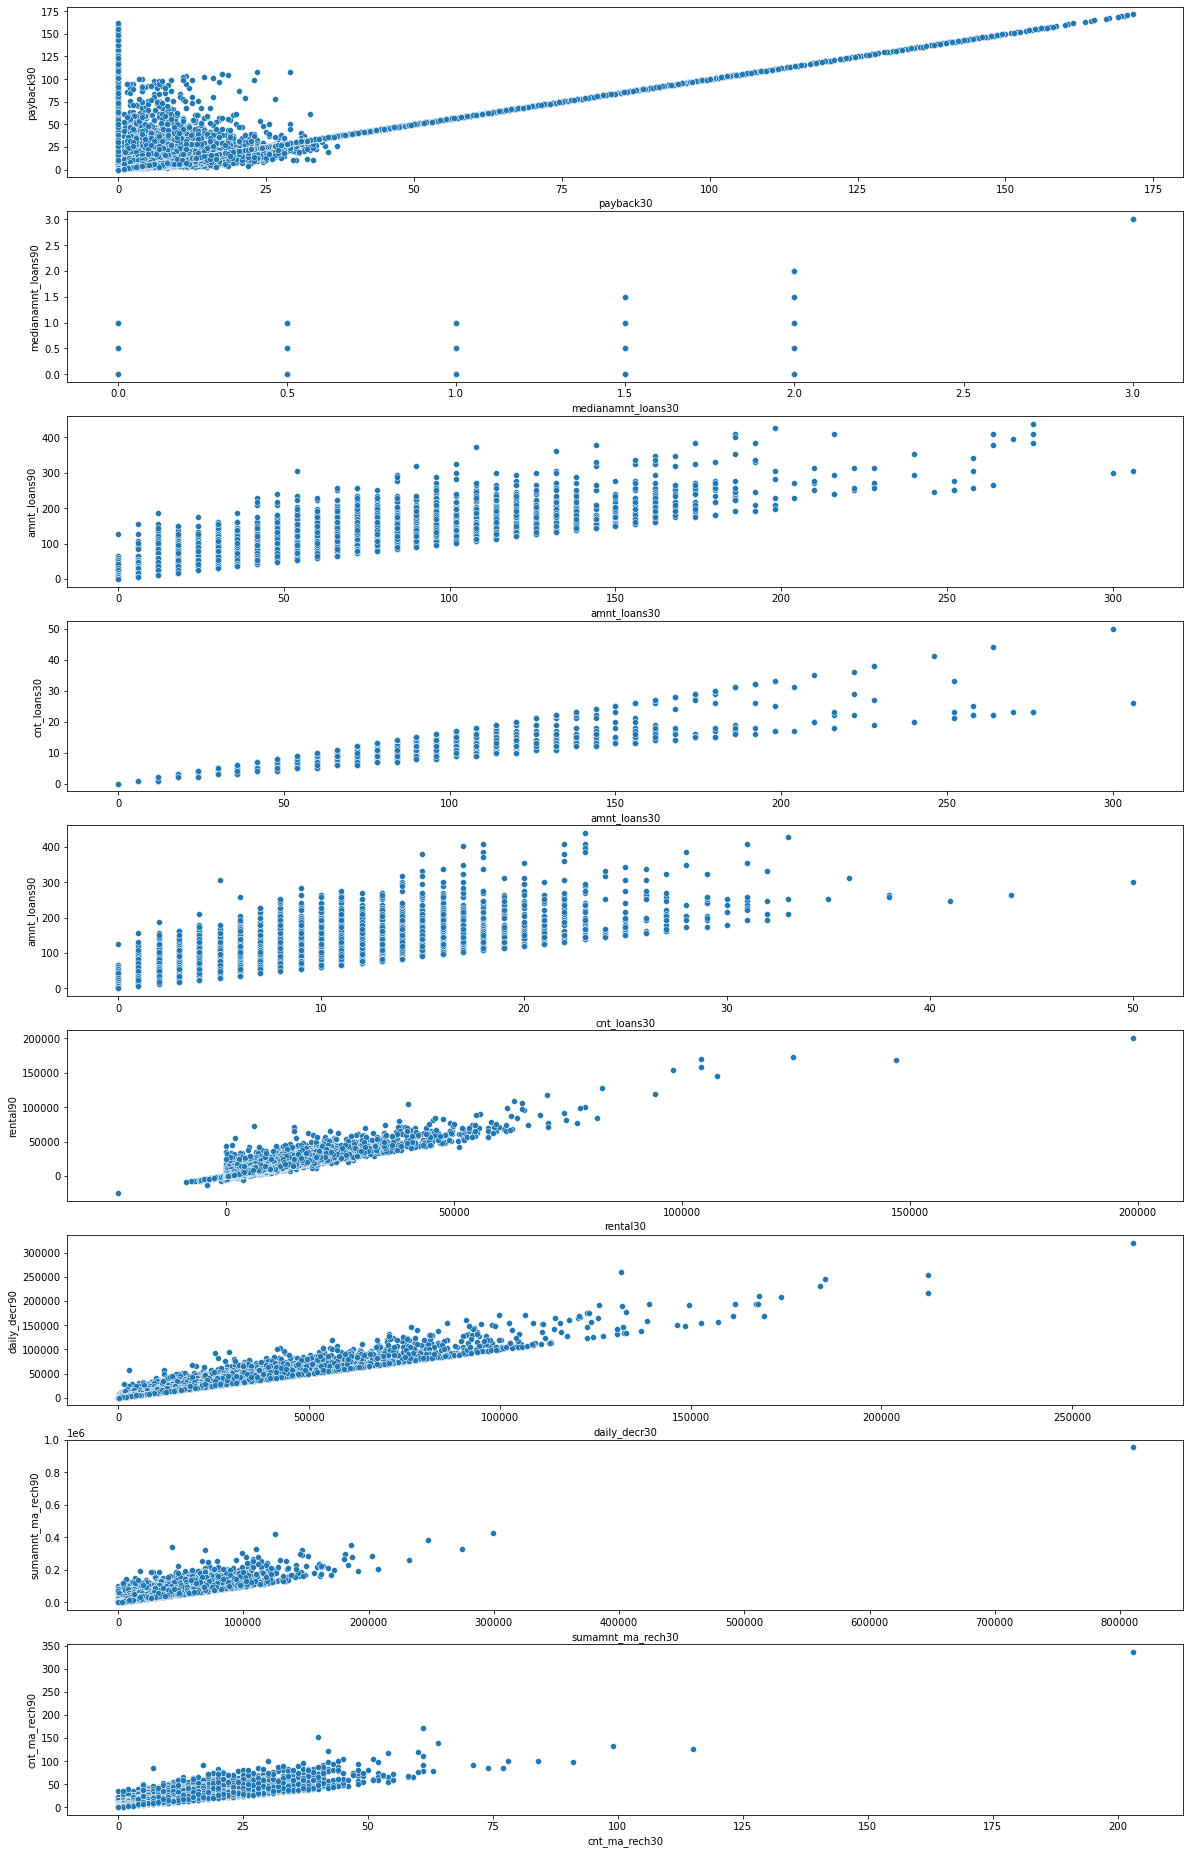

In [15]:
cols1=['payback30','medianamnt_loans30','amnt_loans30','amnt_loans30','cnt_loans30','rental30','daily_decr30','sumamnt_ma_rech30','cnt_ma_rech30']
cols2=['payback90','medianamnt_loans90','amnt_loans90','cnt_loans30','amnt_loans90','rental90','daily_decr90','sumamnt_ma_rech90','cnt_ma_rech90']
counter=1
plt.figure(figsize=(20,150))
for i in range(0,len(cols1)):
        plt.subplot(40,1,counter)
        counter=counter+1
        sns.scatterplot(x=cols1[i],y=cols2[i],data=df)

Linear Relationship is present between the attributes

# Removing outliers

In [16]:
columns =  ['aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90']
for col in columns:
    IQR = df[col].quantile(0.75)-df[col].quantile(0.25)
    Barmax =  df[col].quantile(0.75) + 1.5*IQR
    Barmin =  df[col].quantile(0.25) - 1.5*IQR
    df.loc[df[col]>Barmax,col] = Barmax
    df.loc[df[col]<Barmin,col] = Barmin

Confirming removal of outliers

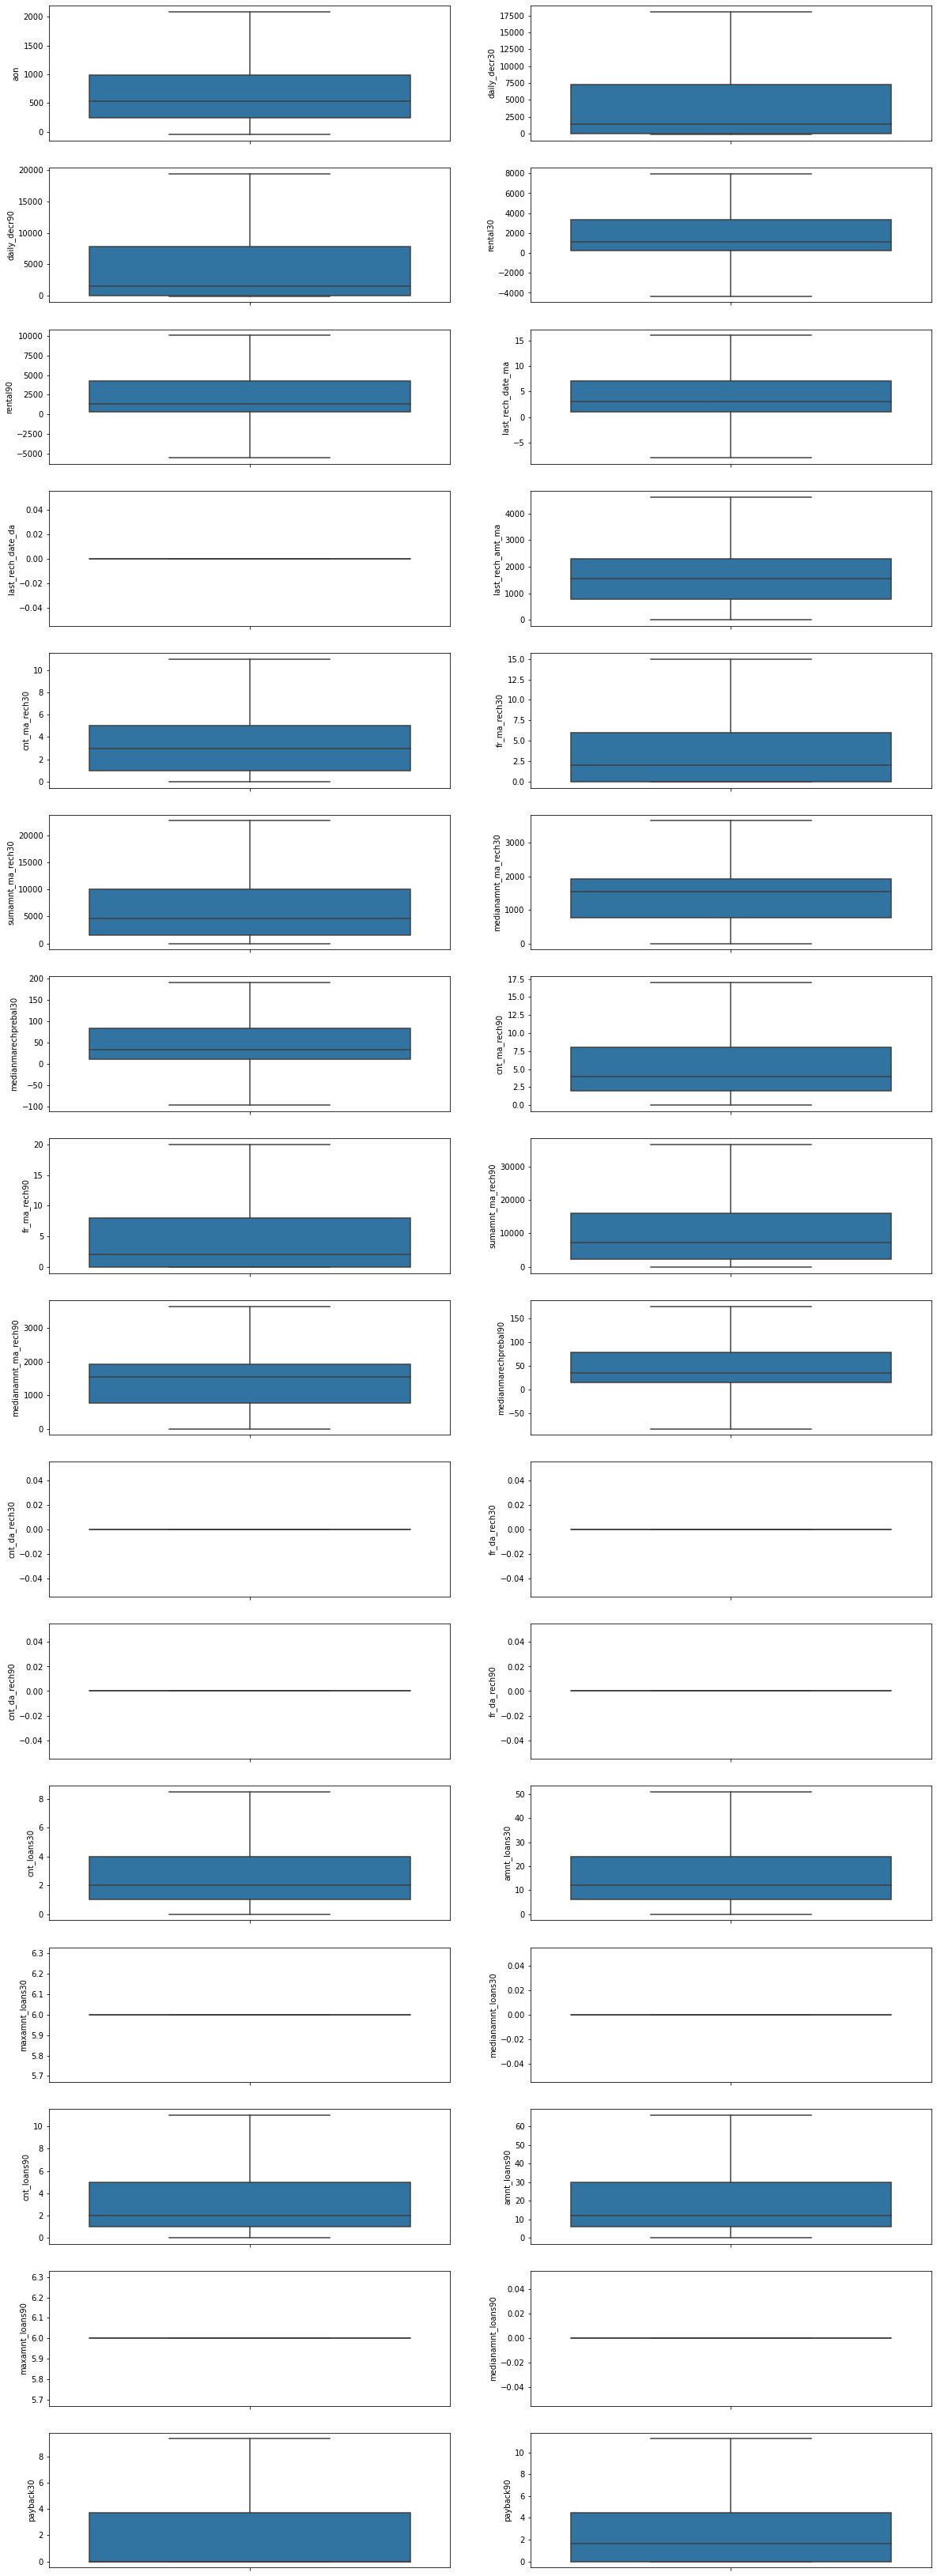

In [17]:

counter=1
plt.figure(figsize=(20,150))
columns = ['aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90']
counter=1;
for i in range(0,len(columns)):
        plt.subplot(40,2,counter)
        counter=counter+1
        sns.boxplot(y=columns[i],hue = columns[i],data=df)
        #sns.boxplot(df[columns[i]])

Outliers are successfully replaced

# scaling the data

In [18]:

fin_df  = df.drop(["label","msisdn","pcircle","pdate"],axis=1) #dropping the object type variables
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(fin_df)
final_df = pd.DataFrame(minmax_df, columns = fin_df.columns)

# removing skewness

In [19]:

fin_df_new=power_transform(final_df)
fin_df_new = pd.DataFrame(fin_df_new,columns=final_df.columns)

confirming removal of skewness

In [20]:
fin_df_new.skew()

Unnamed: 0             -0.059282
aon                     0.136899
daily_decr30            0.439307
daily_decr90            0.457009
rental30                0.072174
rental90                0.122803
last_rech_date_ma      -0.097752
last_rech_date_da       0.000000
last_rech_amt_ma        0.066412
cnt_ma_rech30           0.117539
fr_ma_rech30            0.361435
sumamnt_ma_rech30       0.175850
medianamnt_ma_rech30    0.029866
medianmarechprebal30   -0.071399
cnt_ma_rech90           0.149730
fr_ma_rech90            0.398891
sumamnt_ma_rech90       0.210153
medianamnt_ma_rech90    0.027354
medianmarechprebal90   -0.056745
cnt_da_rech30           0.000000
fr_da_rech30            0.000000
cnt_da_rech90           0.000000
fr_da_rech90            0.000000
cnt_loans30             0.225772
amnt_loans30            0.215155
maxamnt_loans30         0.000000
medianamnt_loans30      0.000000
cnt_loans90             0.296972
amnt_loans90            0.280159
maxamnt_loans90         0.000000
medianamnt

Attributes Skewness in now between the range of -0.5 to +0.5

# Converting Date type

In [21]:
df['pdate']=pd.to_datetime(df['pdate'],format="%Y-%m-%d")
date_df = pd.DataFrame({"p_year": df['pdate'].dt.year,"p_month": df['pdate'].dt.month,"p_day": df['pdate'].dt.day})

In [22]:
date_df.dtypes

p_year     int64
p_month    int64
p_day      int64
dtype: object

In [23]:
fin_df_new = fin_df_new.join(date_df)

In [24]:
fin_df_new.head()

,Unnamed: 0,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,p_year,p_month,p_day
0,-1.785620,-0.786620,0.196421,0.147441,-0.908516,-0.913576,-0.491770,0.0,0.108881,-0.389556,...,0.0,-0.293913,-0.347130,0.0,0.0,1.644372,1.653178,2016,7,20
1,-1.785602,0.361863,1.408481,1.352329,0.939309,0.695065,1.844207,0.0,1.727486,-0.899096,...,0.0,-1.043466,-0.347130,0.0,0.0,-0.914338,-0.983569,2016,8,10
2,-1.785584,-0.031249,-0.348093,-0.377331,-0.376669,-0.496656,-0.231589,0.0,0.108881,-0.899096,...,0.0,-1.043466,-1.074133,0.0,0.0,-0.914338,-0.983569,2016,8,19
3,-1.785565,-0.892838,-0.980235,-0.972219,-0.962012,-0.986024,1.844207,0.0,-0.477830,-1.531078,...,0.0,-0.293913,-0.347130,0.0,0.0,-0.914338,-0.983569,2016,6,6
4,-1.785547,0.781129,-0.911841,-0.908374,-0.241937,-0.381028,0.007944,0.0,0.687064,1.130612,...,0.0,1.327579,1.282327,0.0,0.0,0.502204,0.256484,2016,6,22


We Dropped the pcircle and msisdn column from our dataset. The new dataset is fin_df_new

In [25]:
fin_df_new = fin_df_new.join(df['label'])

# Train_Test_split

In [26]:
#!pip install imblearn

In [27]:
x = fin_df_new.drop(["label"],axis=1)
y = fin_df_new["label"]

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=5)

# SMOTE

In [29]:

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  

sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 128477
Before OverSampling, counts of label '0': 18238 

After OverSampling, the shape of train_X: (256954, 36)
After OverSampling, the shape of train_y: (256954,) 

After OverSampling, counts of label '1': 128477
After OverSampling, counts of label '0': 128477


# Model Training 

-------Logistic Regression-------

In [30]:

LogReg = LogisticRegression(max_iter = 500)
LogReg.fit(x_train_res,y_train_res)
pred = LogReg.predict(x_test)
acc = classification_report(y_test, pred)
print(acc)

              precision    recall  f1-score   support

           0       0.32      0.78      0.45      7924
           1       0.96      0.76      0.85     54954

    accuracy                           0.76     62878
   macro avg       0.64      0.77      0.65     62878
weighted avg       0.88      0.76      0.80     62878



-------DecisionTreeClassifier-------

In [31]:

DTC = DecisionTreeClassifier()
DTC.fit(x_train_res,y_train_res)
pred = DTC.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.48      0.61      0.54      7924
           1       0.94      0.91      0.92     54954

    accuracy                           0.87     62878
   macro avg       0.71      0.76      0.73     62878
weighted avg       0.88      0.87      0.88     62878



------- Random Forest Classifier -------

In [32]:

RFC = RandomForestClassifier()
RFC.fit(x_train_res,y_train_res)
pred = RFC.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.65      0.62      0.64      7924
           1       0.95      0.95      0.95     54954

    accuracy                           0.91     62878
   macro avg       0.80      0.79      0.79     62878
weighted avg       0.91      0.91      0.91     62878



------- Naive Bayes-------

In [33]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train_res, y_train_res)
  
# making predictions on the testing set
pred = gnb.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.28      0.79      0.42      7924
           1       0.96      0.71      0.82     54954

    accuracy                           0.72     62878
   macro avg       0.62      0.75      0.62     62878
weighted avg       0.87      0.72      0.77     62878



------- SVC -------

In [34]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, tol=1e-5)

clf.fit(x_train_res, y_train_res.ravel()) 

LinearSVC(random_state=0, tol=1e-05)

In [35]:
pred = clf.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.41      0.61      0.49      7924
           1       0.94      0.87      0.90     54954

    accuracy                           0.84     62878
   macro avg       0.67      0.74      0.70     62878
weighted avg       0.87      0.84      0.85     62878



# Cross Validation

In [36]:

print(cross_val_score(DTC,x,y,cv=5).mean())

0.8041678530835202


In [37]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.9199639229114943


In [38]:
print(cross_val_score(LogReg,x,y,cv=5).mean())

0.8802011570436712


In [39]:
print(cross_val_score(gnb,x,y,cv=5).mean())

0.7412652335061806


In [40]:
print(cross_val_score(clf,x,y,cv=5).mean())

0.8771762424895014


# Choosing the final model for Hypertuning

    Decision Tree Classifier -> accuracy - cross_val_score = |0.87-0.80| = 0.07
    Random Forest Classifier -> accuracy - cross_val_score = |0.91-0.91| = 0.00
    Logistic Regression -> accuracy - cross_val_score = |0.76-0.88| = 0.12
    Naive Bayes -> accuracy - cross_val_score = |0.72-0.74| = 0.02
    SVC = accuracy - cross_val_score = |0.84-0.87| = 0.03

    The best algo with minimum difference between accuracy and cross balidation score is RandomForest algorithm.
    Hence we will be using Random Forest model for the Hypertuning.

# Hyper-parameter tuning

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
parameter = {
    'max_depth': [110,500,1000,5000],
    'criterion':['gini','entropy']
}
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5)


In [43]:
GCV.fit(x_train_res,y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [110, 500, 1000, 5000]})

In [44]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 1000}

In [46]:
Final_model = RandomForestClassifier(criterion='entropy',max_depth=1000)
Final_model.fit(x_train_res,y_train_res)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

91.015935621362


In [47]:
acc = classification_report(y_test,pred)

In [48]:
print(acc)

              precision    recall  f1-score   support

           0       0.65      0.63      0.64      7924
           1       0.95      0.95      0.95     54954

    accuracy                           0.91     62878
   macro avg       0.80      0.79      0.79     62878
weighted avg       0.91      0.91      0.91     62878



# ROC Curve

In [55]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

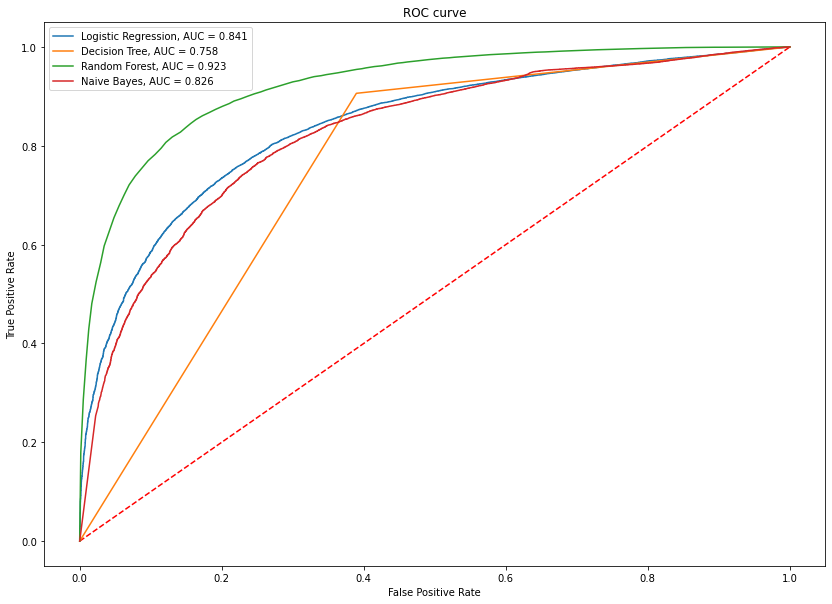

In [58]:

fig = plt.figure(figsize=(14,10))
plt.plot([0, 1], [0, 1],'r--')
#KNN

#Logistic Regression
preds_proba_lg = LogReg.predict_proba(x_test)
probslg = preds_proba_lg[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probslg)
auclg = roc_auc_score(y_test, probslg)
plt.plot(fpr, tpr, label=f'Logistic Regression, AUC = {str(round(auclg,3))}')

#Decision Tree Classifier
preds_proba_DTC = DTC.predict_proba(x_test)
probsDTC = preds_proba_DTC[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probsDTC)
aucDTC = roc_auc_score(y_test, probsDTC)
plt.plot(fpr, tpr, label=f'Decision Tree, AUC = {str(round(aucDTC,3))}')

#Random Forest
preds_proba_RFC = RFC.predict_proba(x_test)
probsRFC = preds_proba_RFC[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probsRFC)
aucRFC = roc_auc_score(y_test, probsRFC)
plt.plot(fpr, tpr, label=f'Random Forest, AUC = {str(round(aucRFC,3))}')

#Naive Bayes
preds_proba_gnb = gnb.predict_proba(x_test)
probsgnb = preds_proba_gnb[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probsgnb)
aucgnb = roc_auc_score(y_test, probsgnb)
plt.plot(fpr, tpr, label=f'Naive Bayes, AUC = {str(round(aucgnb,3))}')

#SVM
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC curve")
plt.rcParams['axes.titlesize'] = 18
plt.legend()
plt.show()

# Modal Saving

In [59]:
import joblib
joblib.dump(Final_model,"Micro Credit Score(Internship).pkl")


['Micro Credit Score(Internship).pkl']